In [1]:
from typing import Any
import ast
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def _safe_eval(x: str) -> Any:
        """Safely evaluate a string as a list."""
        if pd.isna(x):
            return []
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []

In [9]:
def draw_sample(image, caption, lbls_no_template, scrs_no_template, lbls_og_template, scrs_og_template, num_visible_labels = 5):
    fig = plt.figure(layout='constrained', figsize=(10, 4))
    subfigs = fig.subfigures(1, 3, wspace=0.07)

    axsLeft = subfigs[0].subplots(1, 1, sharey=True)
    axsLeft.imshow(image)
    axsLeft.set_xticks([])
    axsLeft.set_yticks([])
    axsLeft.set_frame_on(False)
    axsLeft.set_title("Figure")

    axsMiddle = subfigs[1].subplots(1, 1, sharey=True)
    axsMiddle.text(0, 1, caption, wrap=True, verticalalignment="top", horizontalalignment="left")
    axsMiddle.set_xticks([])
    axsMiddle.set_yticks([])
    axsMiddle.set_frame_on(False)
    axsMiddle.set_title("Caption")

    axsRight = subfigs[2].subplots(1, 1, sharey=True)
    labels_scores = (
        str("<No Template>\n\n")+
        str(_safe_eval(lbls_no_template)[:num_visible_labels])+
        "\n\n"+
        str(np.round(_safe_eval(scrs_no_template)[:num_visible_labels], decimals=3))+
        "\n\n\n<First Template>\n\n"+
        str(_safe_eval(lbls_og_template)[:num_visible_labels])+
        "\n\n"+
        str(np.round(_safe_eval(scrs_og_template)[:num_visible_labels], decimals=3))
    )
    axsRight.text(0, 1, labels_scores, wrap=True, verticalalignment="top", horizontalalignment="left")
    axsRight.set_xticks([])
    axsRight.set_yticks([])
    axsRight.set_frame_on(False)
    axsRight.set_title("Labels and Scores")
    fig.show()

In [10]:
def load_and_show_sample(idx, entries_no_template, entries_og_template):
    root_dir = os.getenv("PMCVL_ROOT_DIR","")
    img_path = os.path.join(root_dir, "figures", entries_no_template["media_name"].iloc[idx])
    cap_path = os.path.join(root_dir, "captions", entries_no_template["caption_name"].iloc[idx])
    # load image
    image = Image.open(img_path).convert("RGB")
    # load caption
    with open(cap_path, encoding="utf-8") as file:
        caption = file.read()
    # load labels
    lbls_no_template = entries_no_template["labels"].iloc[idx]
    scrs_no_template = entries_no_template["scores"].iloc[idx]
    lbls_og_template = entries_og_template["labels"].iloc[idx]
    scrs_og_template = entries_og_template["scores"].iloc[idx]

    draw_sample(image, caption, lbls_no_template, scrs_no_template, lbls_og_template, scrs_og_template, num_visible_labels = 5)

In [4]:
entries_no_template = pd.read_csv("entries_notemplate.csv")
entries_og_template = pd.read_csv("entries_ogtemplate.csv")

/tmp/ipykernel_16178/1662543432.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(layout='constrained', figsize=(10, 4))


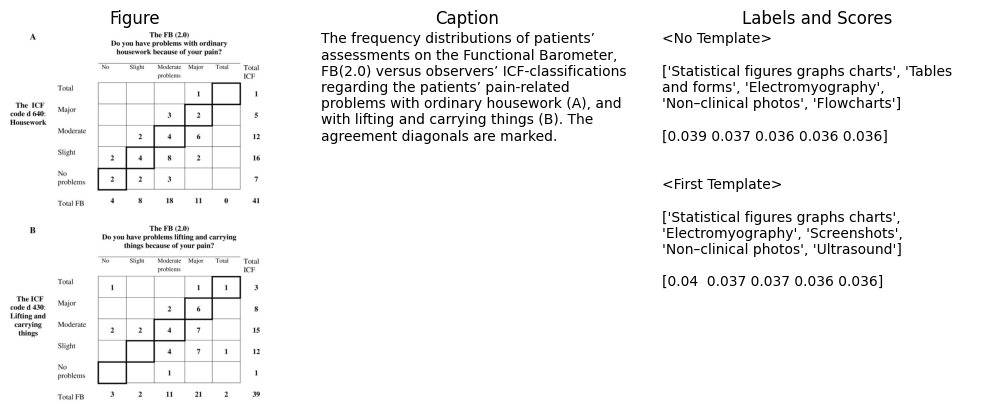

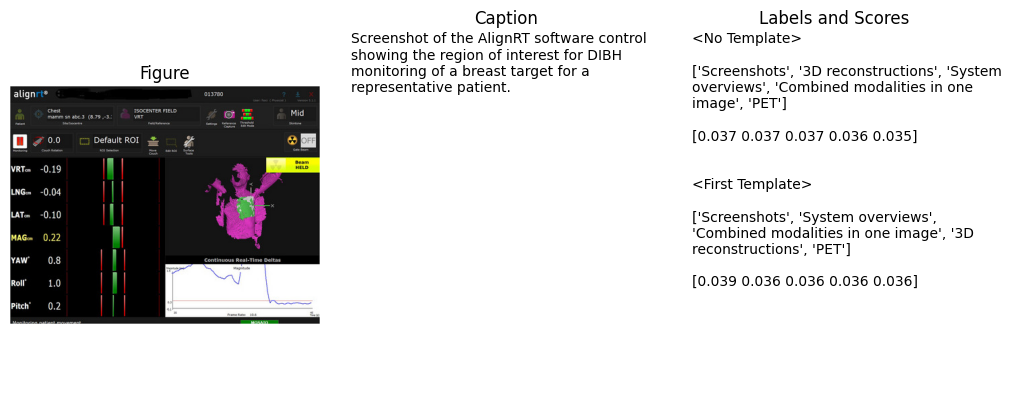

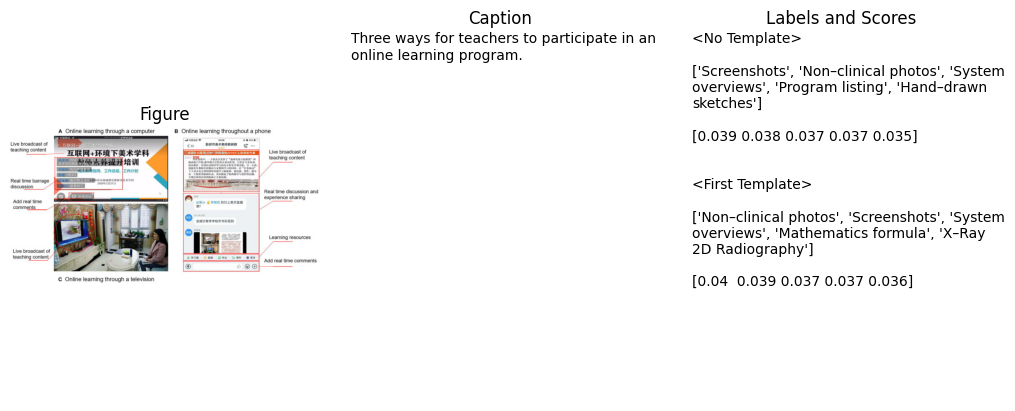

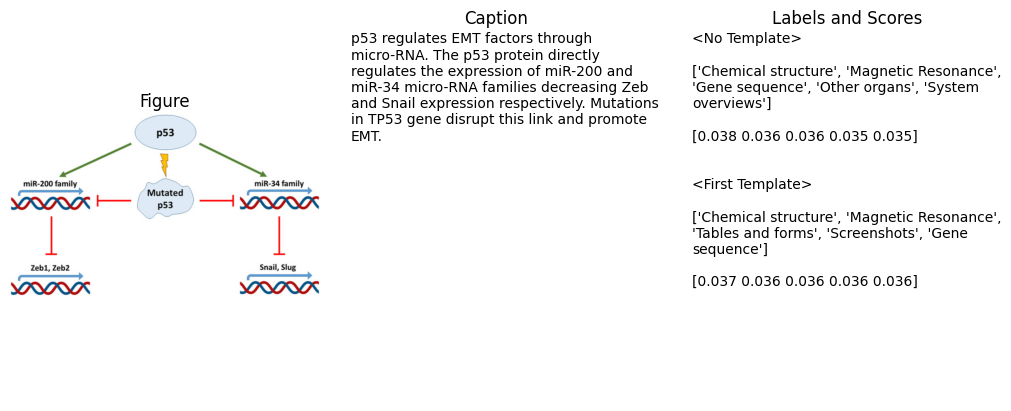

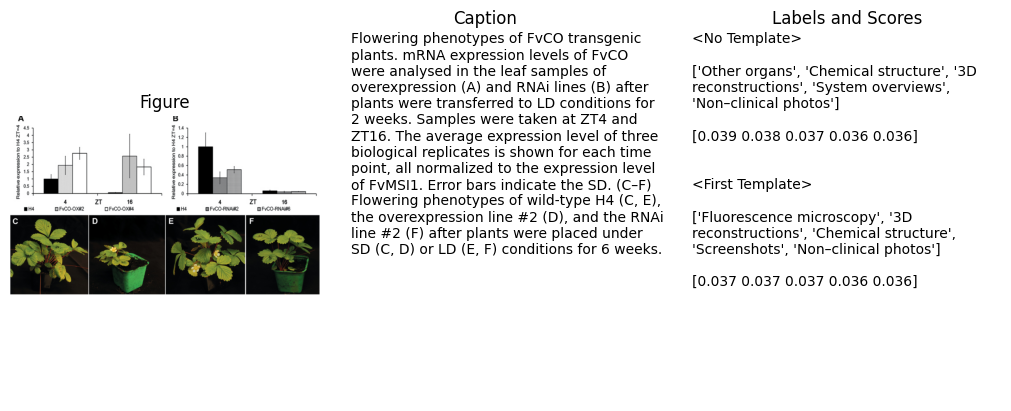

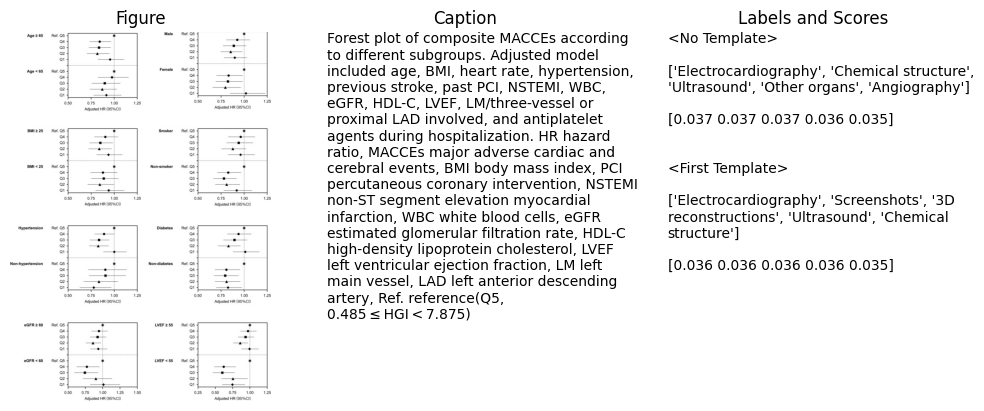

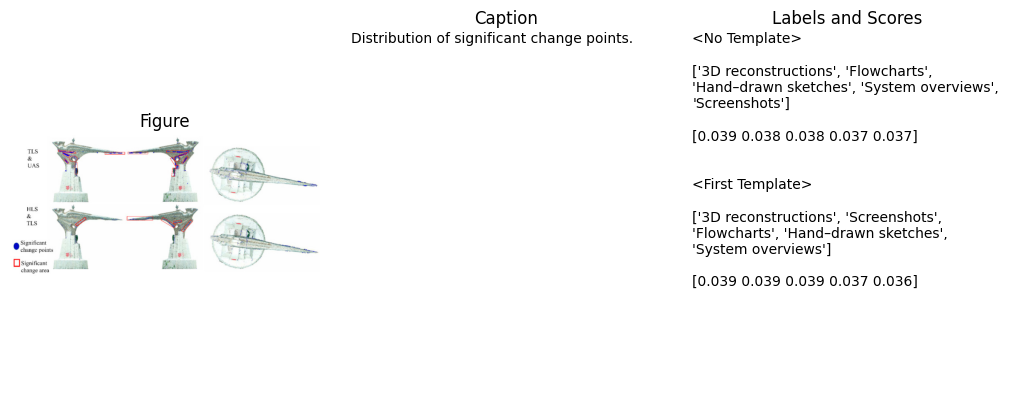

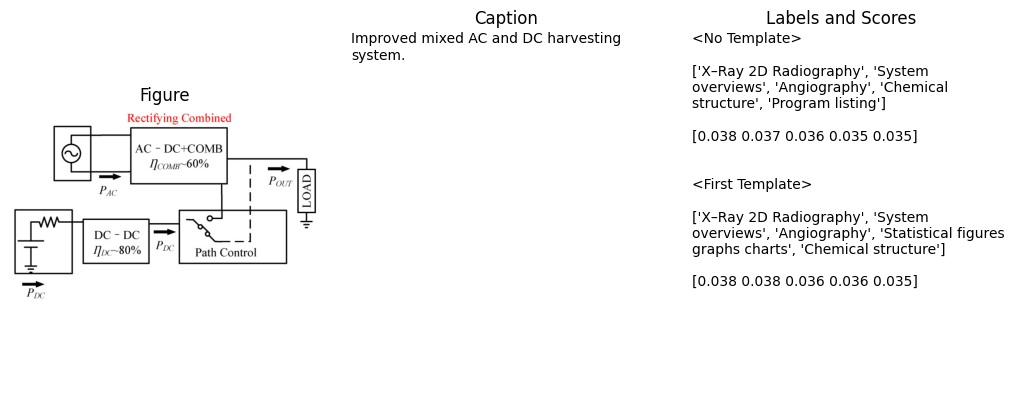

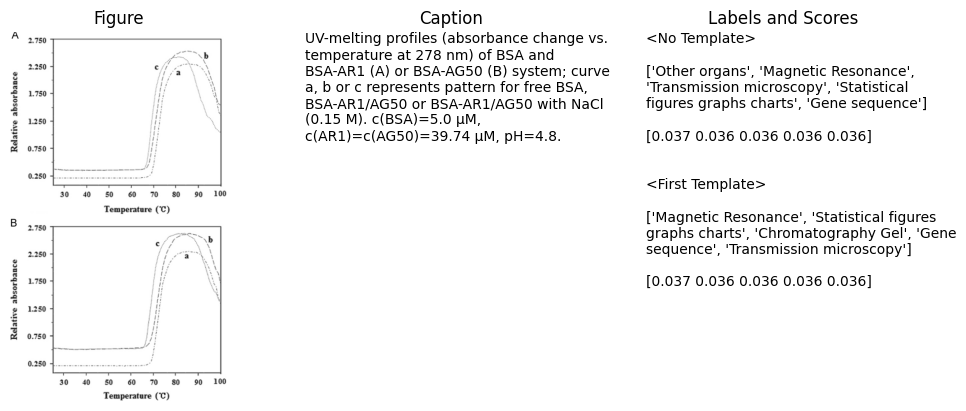

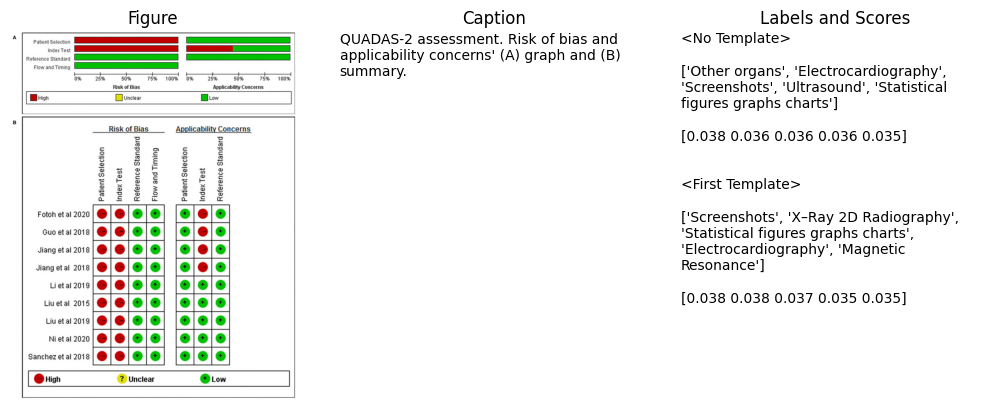

/h/yaspar/Documents/envs/openpmcvl/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


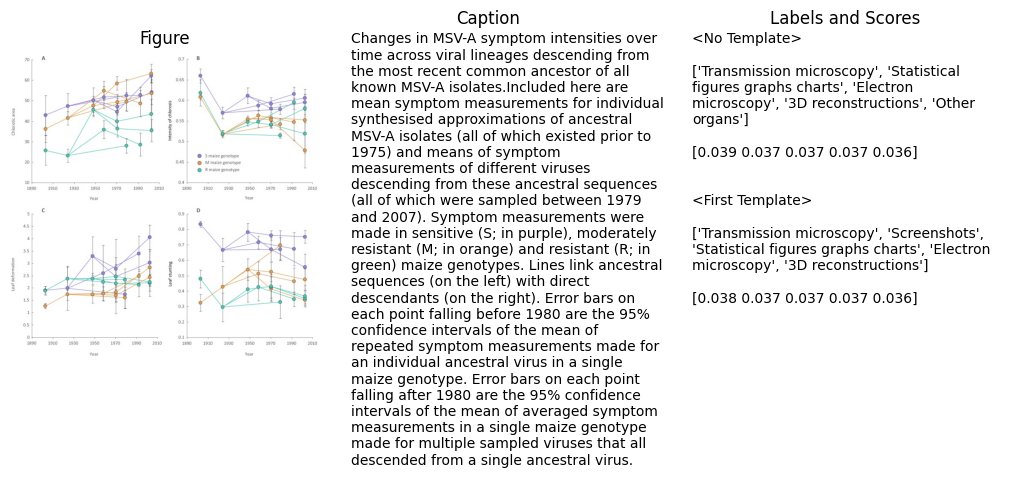

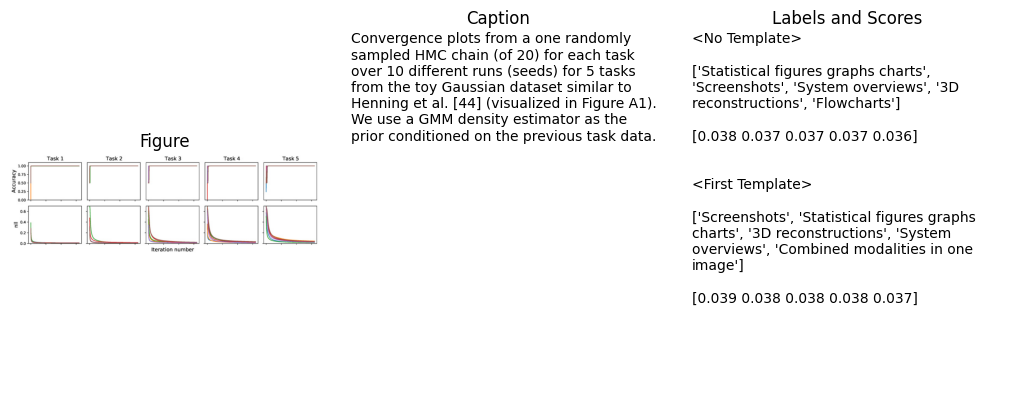

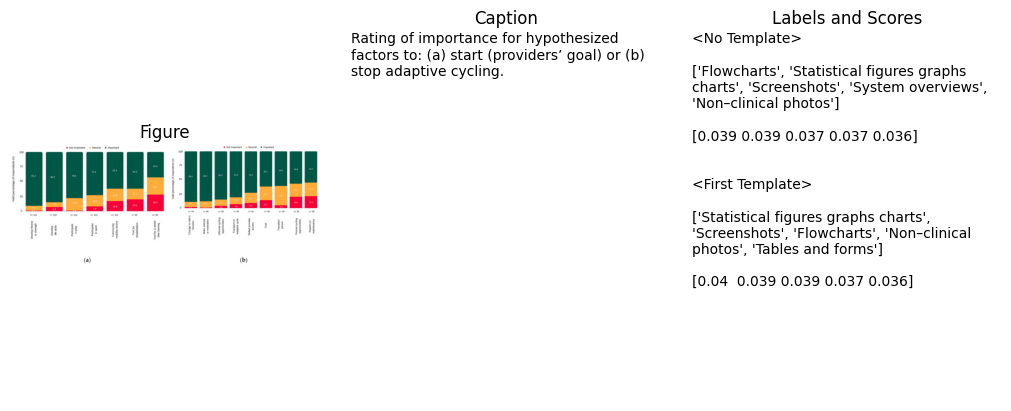

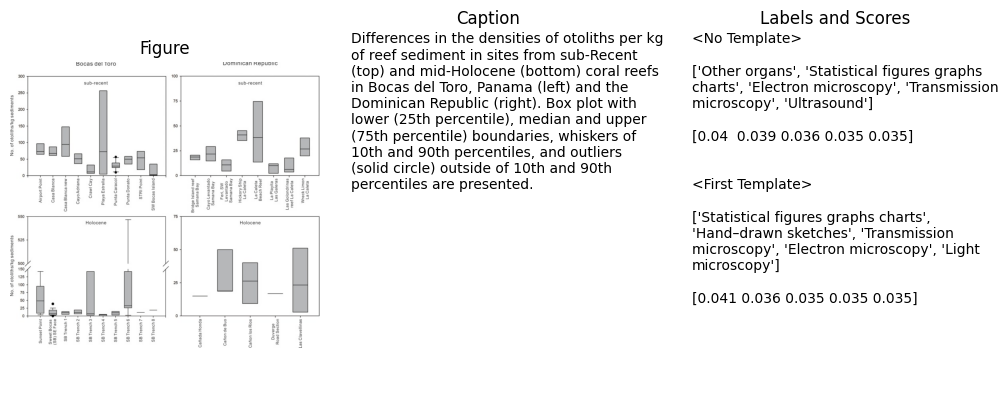

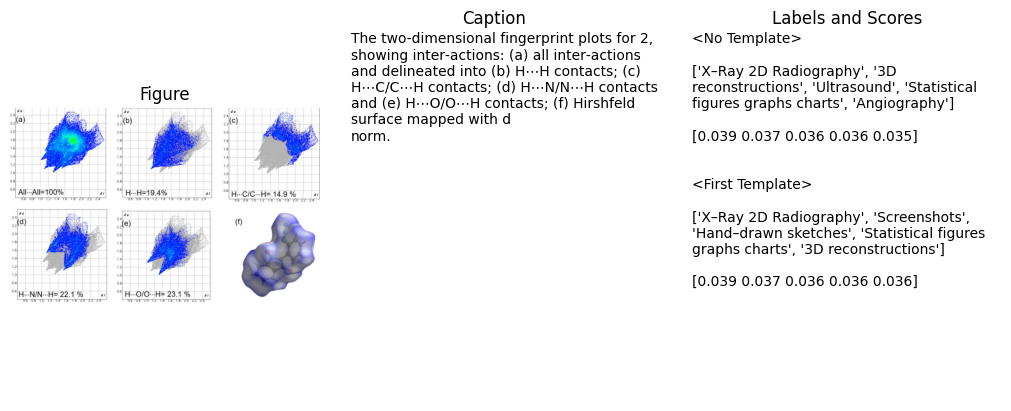

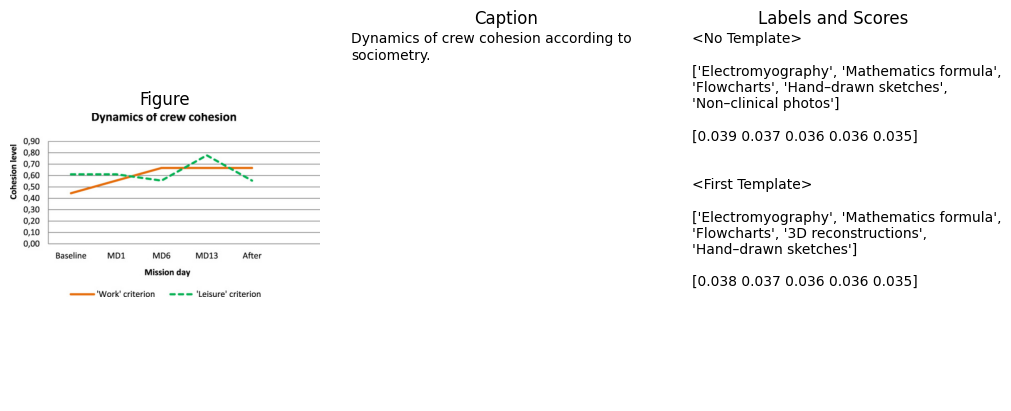

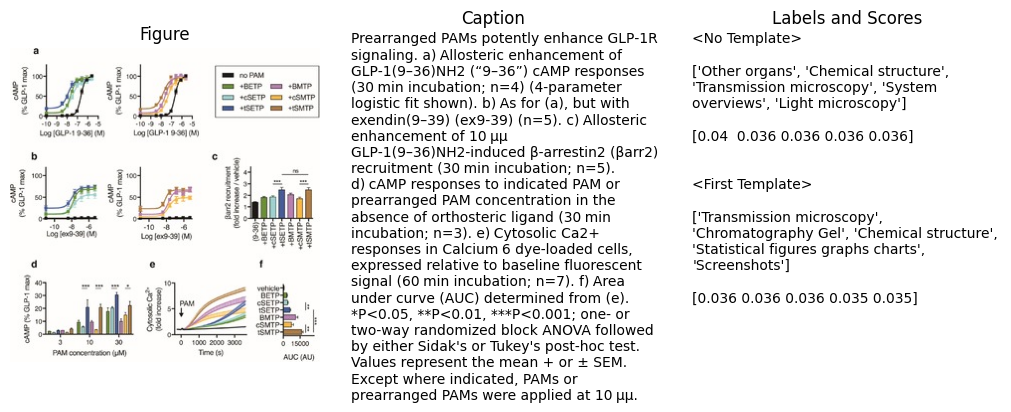

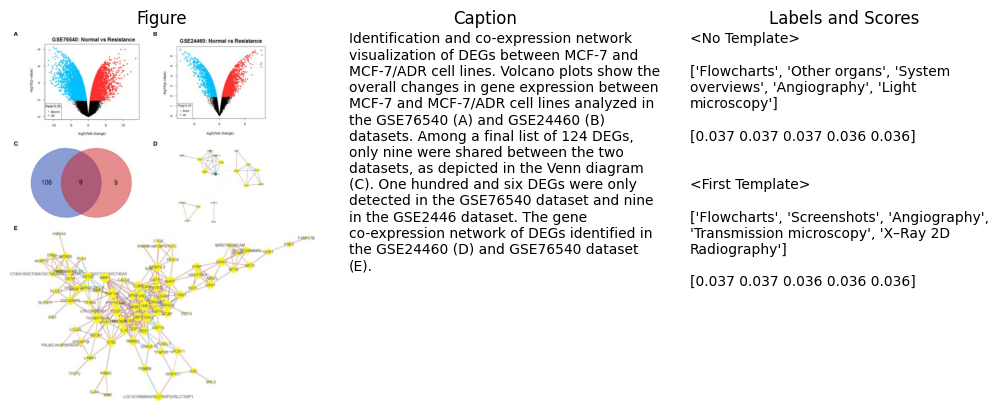

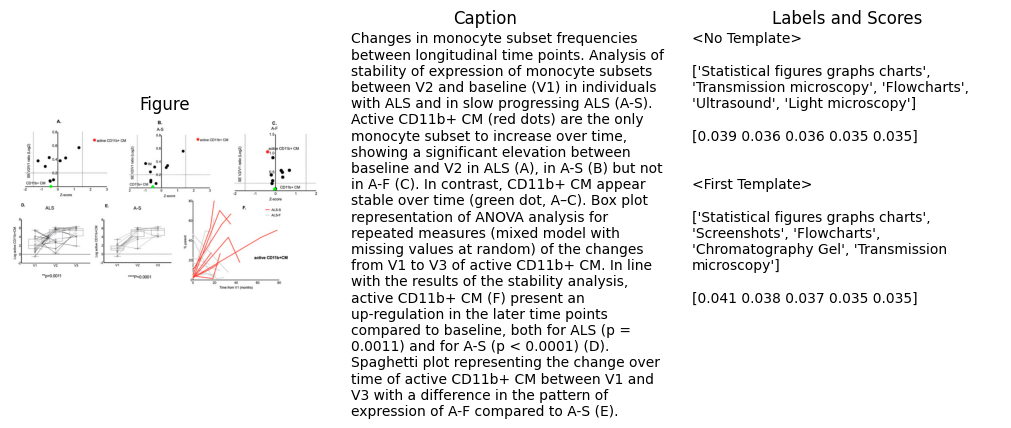

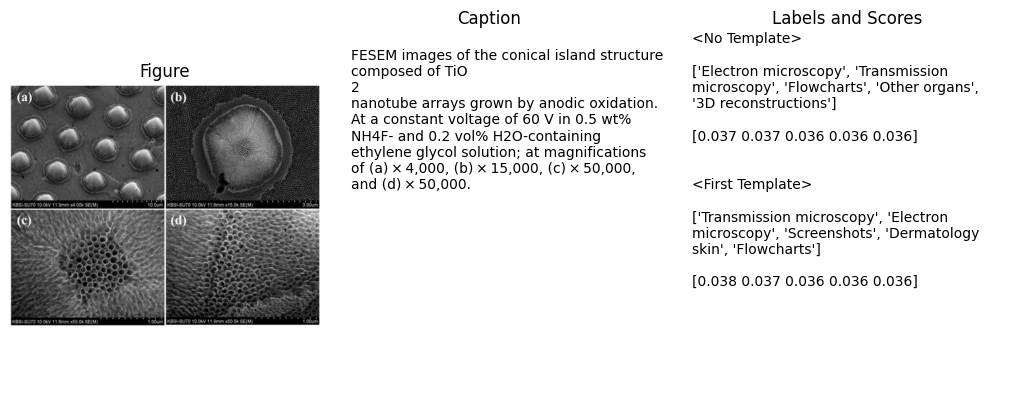

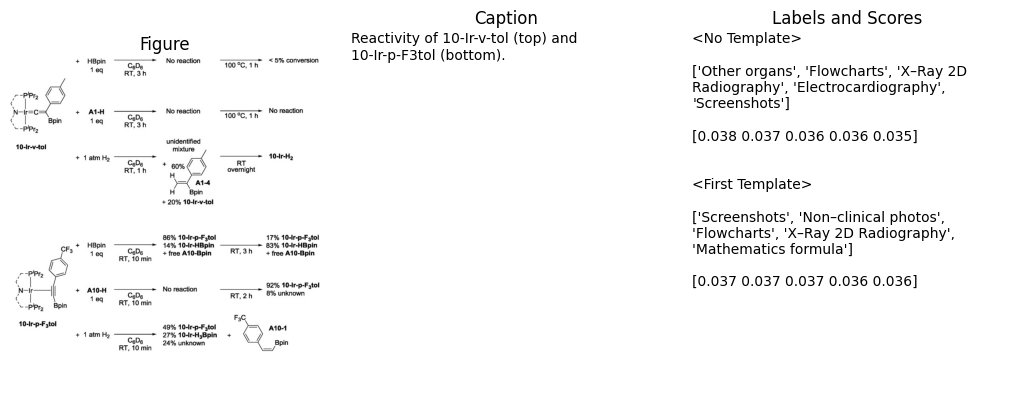

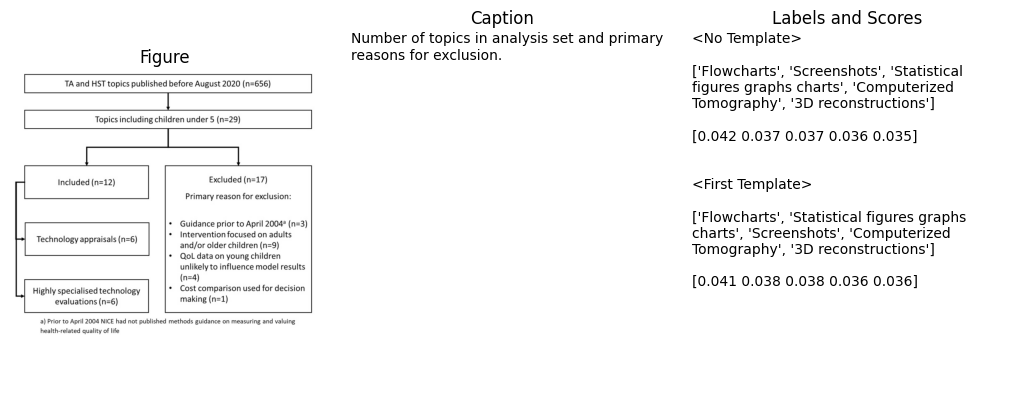

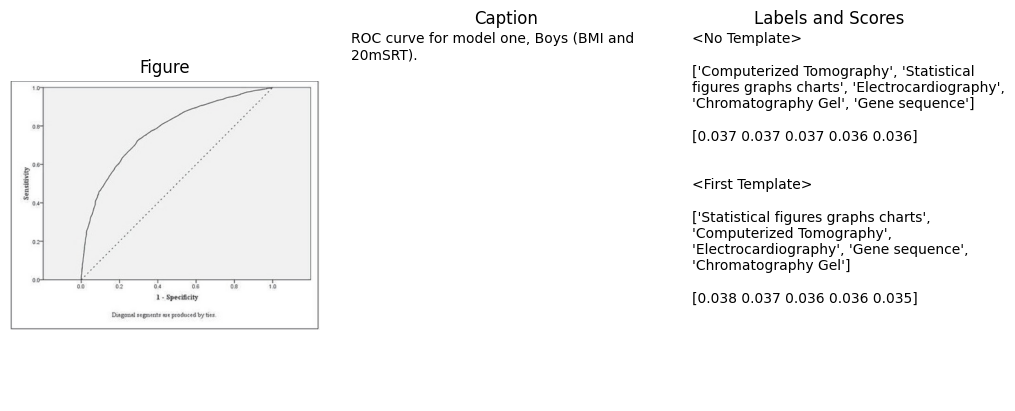

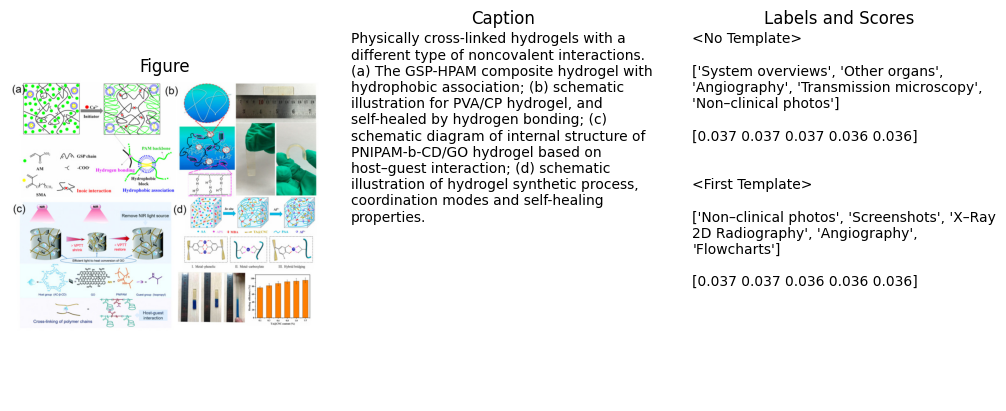

In [17]:
for idx in range(24):
    load_and_show_sample(idx, entries_no_template, entries_og_template)